In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

以下將做實驗去檢視PCA和AE的降維效果，PCA和AE最大的差異及為一個是使用線性轉換的方式達成維度下降，
另一個則是使用非線性的方式進行降維。線性變換會有較多的限制，因此在進行特徵提取時常常會導致過多的資料遺失。

在這個Notebook中我們將進行兩個實驗，實驗如下:
1. 創建出一個有2個feature的函式，分別透過PCA和AE將其維度降至一維，在重建特徵。藉此去比較線性和非線性再進行維度下降時，比較哪種方式能夠保有較多的資訊。
2. 創建出一個有3個feature的函式，一樣透過線性跟非線性的方式降至二維，比較在較高維度進行降維時的效果差異。


In [2]:
# Generate 2d data
x = np.linspace(-1000, 1000, 100)
y = x** 3 +20

data = pd.DataFrame({'x': x, 'y': y}).values

[1/200] Loss: 6.126130251450832
[11/200] Loss: 4.415207946960436
[21/200] Loss: 1.0643966023417306
[31/200] Loss: 0.3273533936808235
[41/200] Loss: 0.1254071093917446
[51/200] Loss: 0.2634971828920243
[61/200] Loss: 0.3491350622025493
[71/200] Loss: 0.15844593361998704
[81/200] Loss: 0.38866459680139087
[91/200] Loss: 0.3345846660522511
[101/200] Loss: 0.4947043079591822
[111/200] Loss: 0.15552796098745603
[121/200] Loss: 0.5537676364474464
[131/200] Loss: 0.4682937370198488
[141/200] Loss: 0.2998408156086043
[151/200] Loss: 0.17597624062727846
[161/200] Loss: 0.2565530095585018
[171/200] Loss: 0.25765505601884797
[181/200] Loss: 0.1647626887320257
[191/200] Loss: 0.13445908469520873


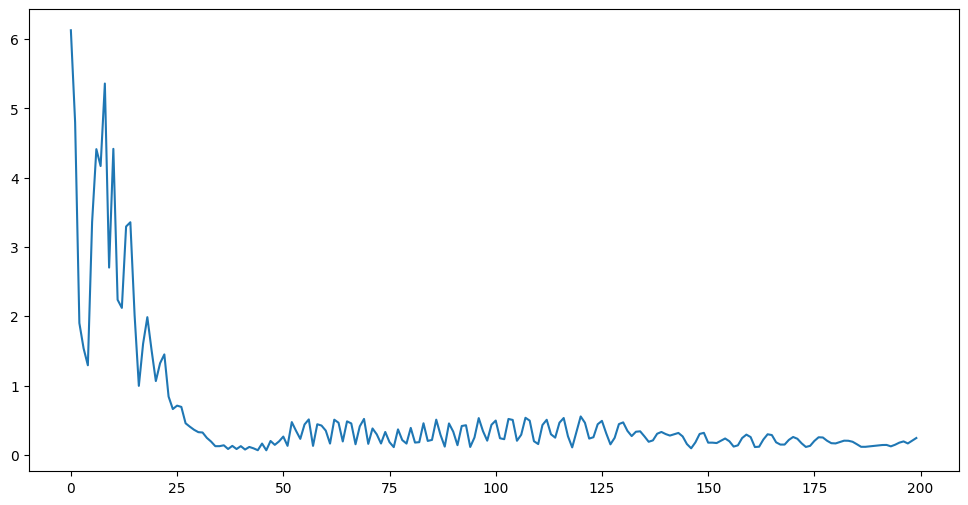

In [3]:
# Use pca reduce the feature dim to 1d and reconstruction to 2d

pca = PCA(n_components = 1)
data_pca = pca.fit_transform(data)
data_reconstruction = pca.inverse_transform(data_pca)

# Use AutoEncoder reduce the feature

ae_scaler = MinMaxScaler(feature_range = (0, 1))
data_AE = ae_scaler.fit_transform(data)
data_AE = torch.from_numpy(data_AE).float()
fake = torch.from_numpy(np.zeros(100)).float()

data_loader = DataLoader(TensorDataset(data_AE, fake), batch_size = 1, shuffle = True)

from Models.AutoEncoder import Autoencoder
from Tools.Training import training_AE

model = Autoencoder([2, 100, 50, 1])
model = training_AE(model, data_loader, 200, 0.0001)

model.eval()
_, data_reconstruction_ae = model(data_AE)
data_reconstruction_ae = ae_scaler.inverse_transform(data_reconstruction_ae.detach().numpy())

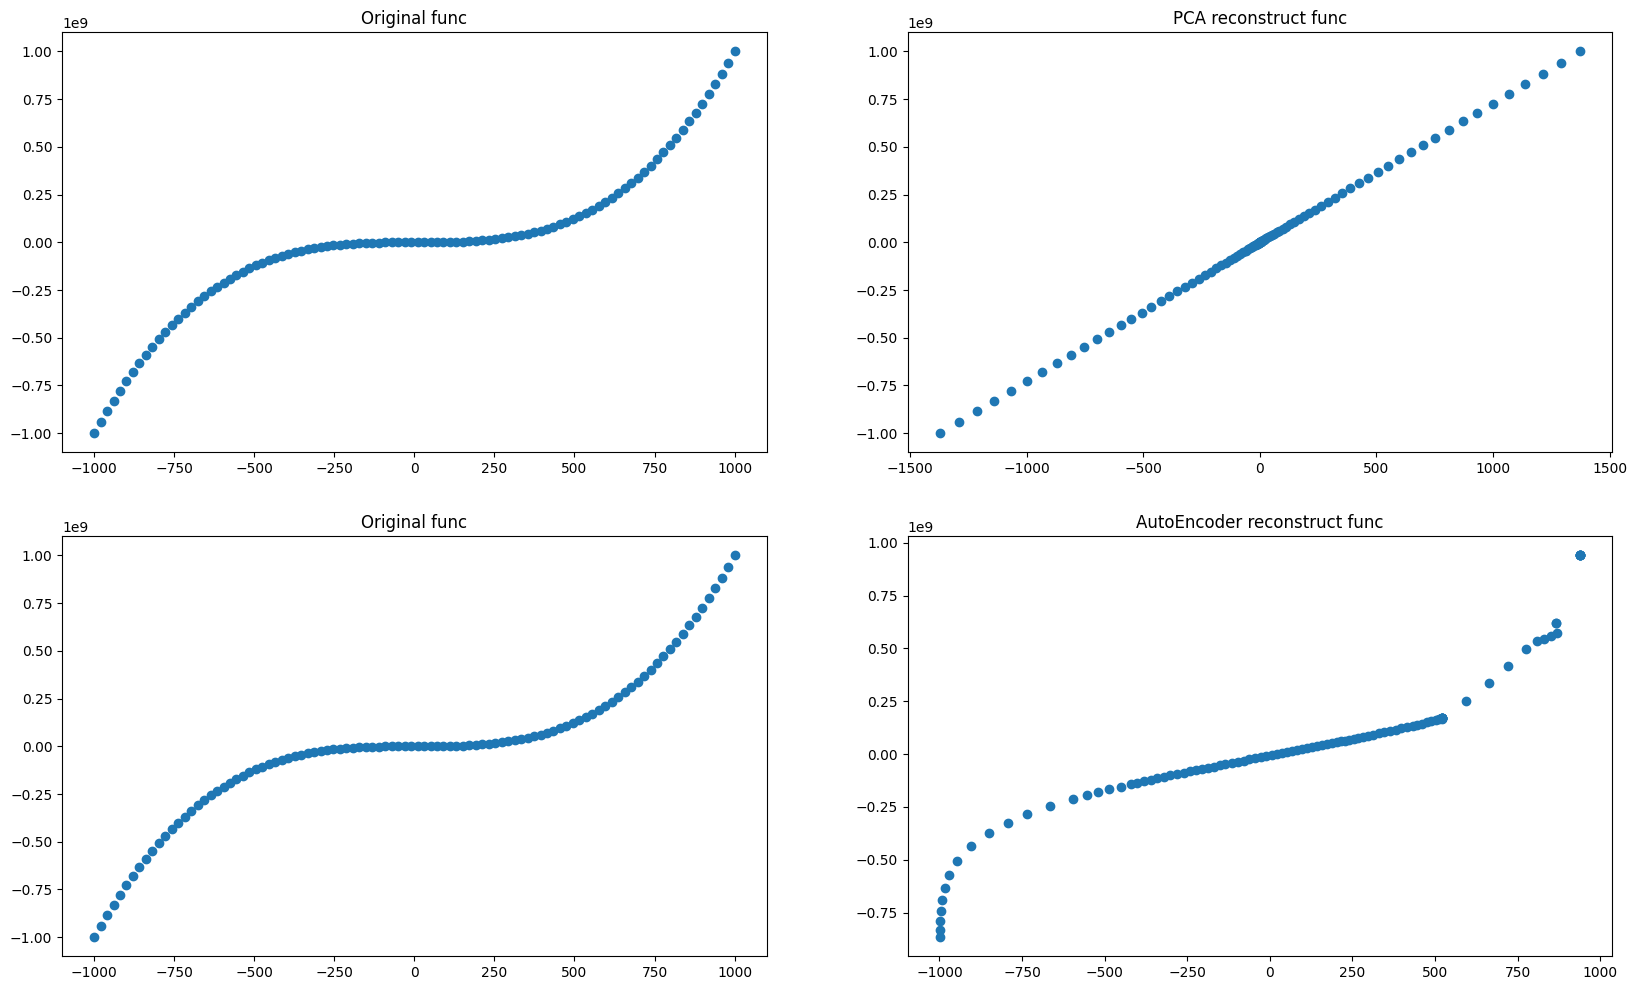

In [4]:
# visualize the result

plt.figure(figsize = (20, 12)).subplots(2, 2)

plt.subplot(2, 2, 1)
plt.title('Original func')
plt.scatter(data[:, 0], data[:, 1])

plt.subplot(2, 2, 2)
plt.title('PCA reconstruct func')
plt.scatter(data_reconstruction[:, 0], data_reconstruction[:, 1])

plt.subplot(2, 2, 3)
plt.title('Original func')
plt.scatter(data[:, 0], data[:, 1])

plt.subplot(2, 2, 4)
plt.title('AutoEncoder reconstruct func')
plt.scatter(data_reconstruction_ae[:, 0], data_reconstruction_ae[:, 1])

In [5]:
# test 2
# Generate 2d data
x = np.linspace(-1000, 1000, 50)
y = x
X,Y = np.meshgrid(x,y)
Z = X** 3 + Y ** 3

data = pd.DataFrame(data = {'x': X.reshape(2500), 'y': Y.reshape(2500), 'z': Z.reshape(2500)}).values

[1/100] Loss: 142.32017120379896
[11/100] Loss: 11.70501121207053
[21/100] Loss: 1.2355134670151529
[31/100] Loss: 1.4674307415384646
[41/100] Loss: 4.630865176991392
[51/100] Loss: 1.845916436733546
[61/100] Loss: 2.1870605879150844
[71/100] Loss: 3.268004113684583
[81/100] Loss: 2.5412122987995645
[91/100] Loss: 1.6429522839164292


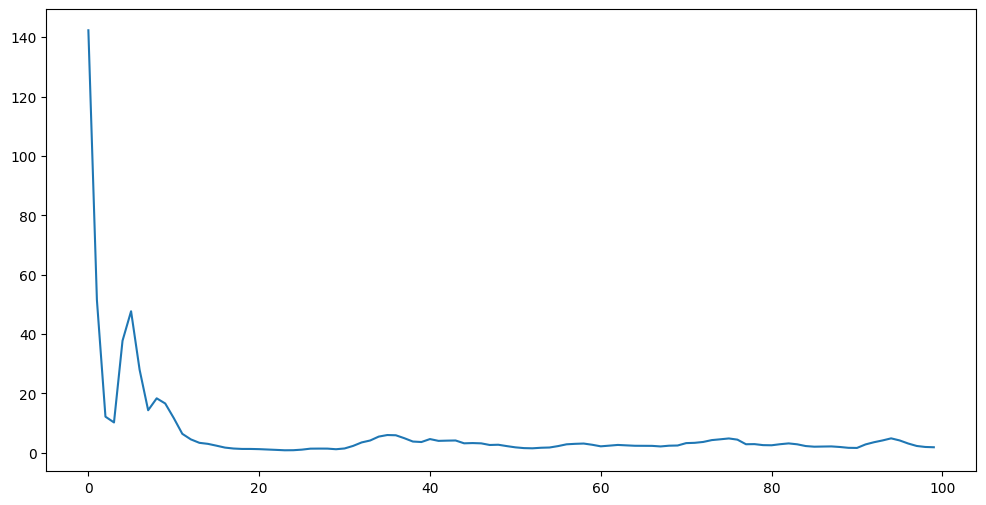

In [6]:
# Use pca reduce the feature dim to 1d and reconstruction to 2d

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data)
data_reconstruction = pca.inverse_transform(data_pca)

# Use AutoEncoder reduce the feature
ae_scaler = MinMaxScaler(feature_range = (0, 1))
data_AE = ae_scaler.fit_transform(data)
data_AE = torch.from_numpy(data_AE).float()
fake = torch.from_numpy(np.zeros(2500)).float()

data_loader = DataLoader(TensorDataset(data_AE, fake), batch_size = 1, shuffle = True)

from Models.AutoEncoder import Autoencoder
from Tools.Training import training_AE

model = Autoencoder([3, 100, 50, 2])
model = training_AE(model, data_loader, 100, 0.00001)

model.eval()
_, data_reconstruction_ae = model(data_AE)
data_reconstruction_ae = ae_scaler.inverse_transform(data_reconstruction_ae.detach().numpy())

Text(0.5, 0.92, 'Autoencoder reconstruct func')

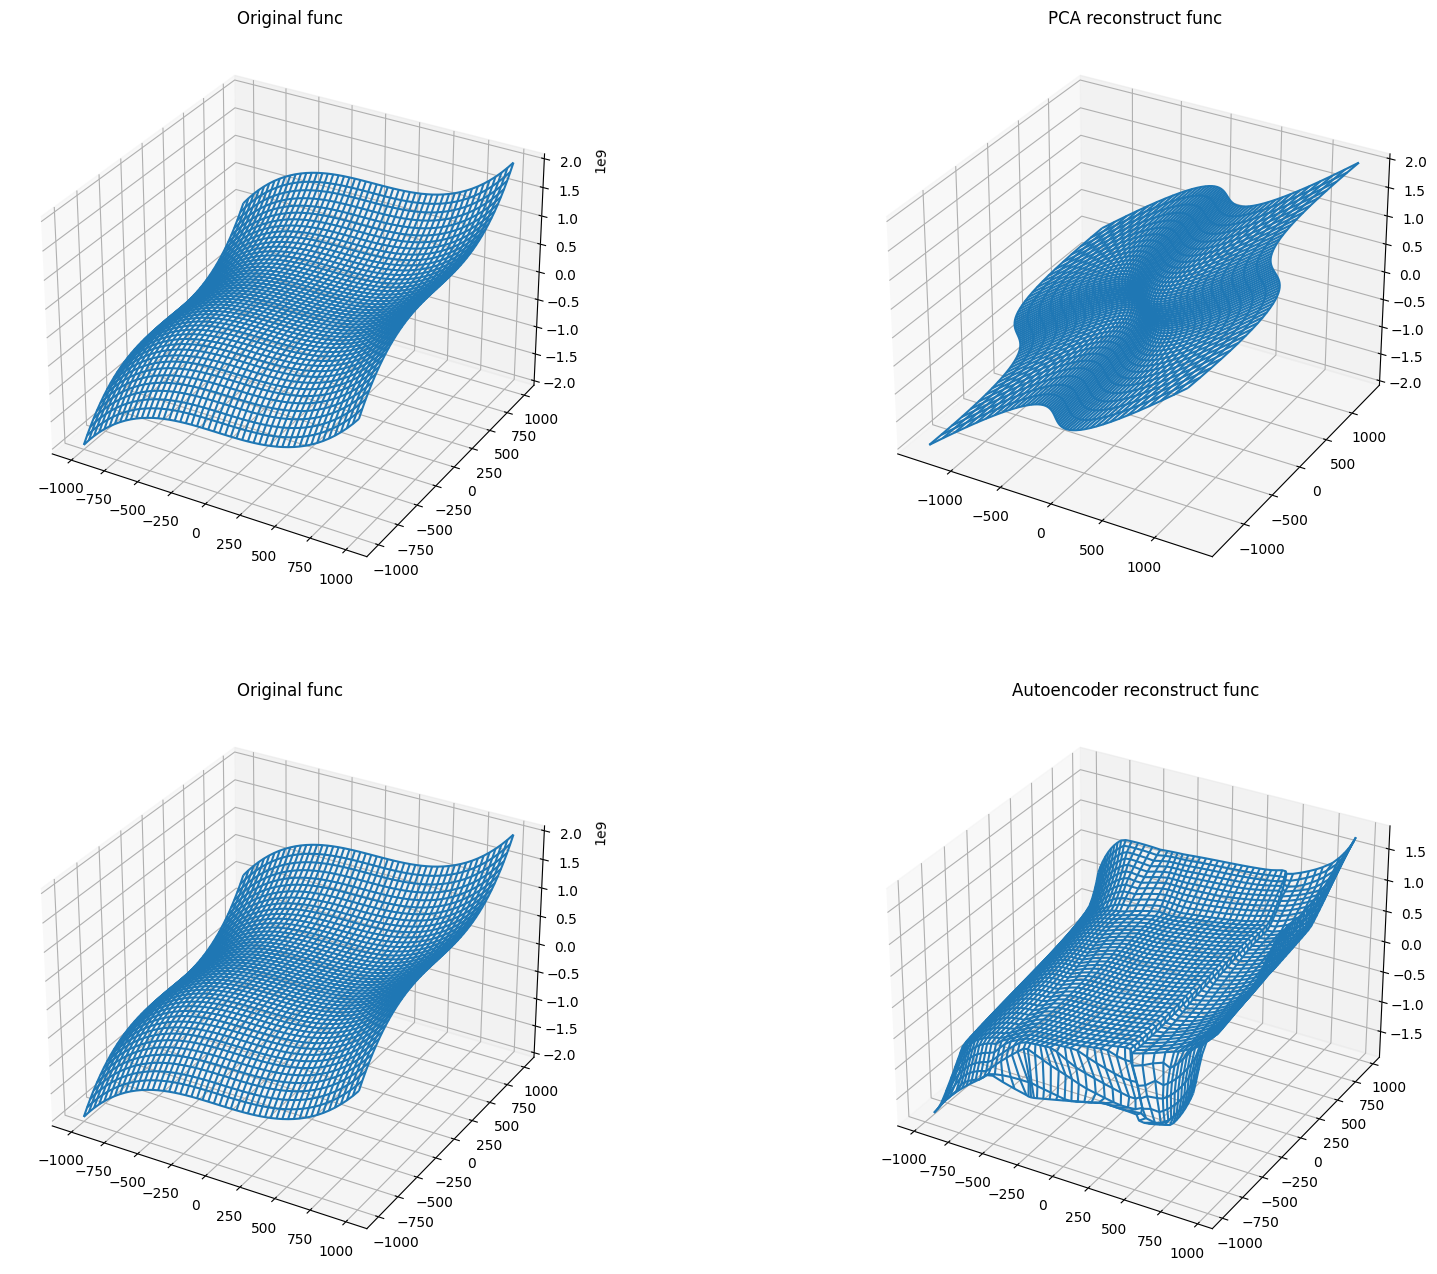

In [7]:
# visualize the result

fig = plt.figure(figsize = (20, 16))

ax = fig.add_subplot(221, projection='3d')
ax.plot_wireframe(data[:, 0].reshape(50, 50), data[:, 1].reshape(50, 50), data[:, 2].reshape(50, 50))
plt.title('Original func')

ax = fig.add_subplot(222, projection='3d')
ax.plot_wireframe(data_reconstruction[:, 0].reshape(50, 50), data_reconstruction[:, 1].reshape(50, 50), data_reconstruction[:, 2].reshape(50, 50))
plt.title('PCA reconstruct func')

ax = fig.add_subplot(223, projection='3d')
ax.plot_wireframe(data[:, 0].reshape(50, 50), data[:, 1].reshape(50, 50), data[:, 2].reshape(50, 50))
plt.title('Original func')

ax = fig.add_subplot(224, projection='3d')
ax.plot_wireframe(data_reconstruction_ae[:, 0].reshape(50, 50), data_reconstruction_ae[:, 1].reshape(50, 50), data_reconstruction_ae[:, 2].reshape(50, 50))
plt.title('Autoencoder reconstruct func')